In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

**DATA IMPORTATION**

In [ ]:
df=pd.read_csv("/content/data/TOP_SELLING_DATA1.csv")
df.head()

,Category Name,Brand Name,Item Name,Quantity
0,Beverages,Pop Apple,Pop Apple 35cl*12pcs,10.0
1,Beverages,Pop Cola,Pop Cola*12pcs(35cl),20.0
2,Beverages,Pop Orange,Pop Orange (35cl)*12pcs,10.0
3,Beverages,Infinite Power,Infinite Power Blue Extreme 50cl*12pcs,20.0
4,Beverages,PopGinger,Pop Ginger 35cl*12pcs,1.0


In [ ]:
# Get the row(s) where the 'quantity' column has the maximum value
max_quantity_row = df[df['Quantity'] == df['Quantity'].max()]
min_quantity_row = df[df['Quantity'] == df['Quantity'].min()]

In [ ]:
print(max_quantity_row)
print(min_quantity_row)

     Category Name  Brand Name                   Item Name  Quantity
1514     MFBiscuits    MF7 to 7  7 to 7 Coconut 40gx48Pack     900.0
     Category Name  Brand Name              Item Name  Quantity
4100      Beverages    Pop Cola  Pop Cola*12pcs(35cl)     -82.0


In [ ]:
index_number=1514
print(df.iloc[index_number])

Category Name                    MFBiscuits
Brand Name                         MF7 to 7
Item Name         7 to 7 Coconut 40gx48Pack
Quantity                              900.0
Name: 1514, dtype: object


In [ ]:
df["Category Name "].unique()

array(['Beverages', 'MFDetergent', 'MFSoap', 'MFBiscuits', 'MFSweets',
       'MFBeverages', 'Biscuits', 'Sweets', 'Soap'], dtype=object)

In [ ]:
df.shape

(4761, 4)

In [ ]:
# Group by 'BrandName' and find the maximum and minimum values for each group
max_min_by_brand = df.groupby('Brand Name ').agg({'Quantity': ['max', 'min']})

In [ ]:
max_min_by_brand

Quantity       
                    max    min
Brand Name                    
3 Star             30.0 -10.00
7 to 7             40.0   0.42
Big Bite           20.0  20.00
ButterBite         30.0   4.00
ChocoSnaps         13.0   2.00
...                 ...    ...
Power Up           20.0   1.00
Royal Wafer        50.0   5.00
Secret Bites       15.0   1.00
Tongue Painter     20.0   1.00
Zigzag             40.0   1.00

[70 rows x 2 columns]

In [ ]:
# Check if there are any negative values in the 'Quantity' column
negative_values = df[df['Quantity'] < 0]

In [ ]:
negative_values

,Category Name,Brand Name,Item Name,Quantity
2801,Beverages,3 Star,Infinite Power 50cl,-10.00
3114,MFDetergent,MFTooCleanPro,TooClean Pro 85g*50,-0.04
4077,Beverages,PopUp,Pop Up Clear 35Cl * 12,-5.00
4082,Beverages,Infinite Power,Infinite Power 50cl,-9.00
4083,Beverages,Pop Apple,Pop Apple 35cl*12pcs,-11.00
4084,Beverages,PopUp,Pop Up Clear 35Cl * 12,-10.00
4100,Beverages,Pop Cola,Pop Cola*12pcs(35cl),-82.00


In [ ]:
df.head()

,Category Name,Brand Name,Item Name,Quantity
0,Beverages,Pop Apple,Pop Apple 35cl*12pcs,10.0
1,Beverages,Pop Cola,Pop Cola*12pcs(35cl),20.0
2,Beverages,Pop Orange,Pop Orange (35cl)*12pcs,10.0
3,Beverages,Infinite Power,Infinite Power Blue Extreme 50cl*12pcs,20.0
4,Beverages,PopGinger,Pop Ginger 35cl*12pcs,1.0


**DROPPING ROWS WITH NEGATIVE VALUES**


In [ ]:
# Drop rows where 'Quantity' column has negative values
df = df[df['Quantity'] >= 0]

# Check if the negative values are removed
print("Number of negative values in 'Quantity' column after removal:", len(df[df['Quantity'] < 0]))

Number of negative values in 'Quantity' column after removal: 0


In [ ]:
df[df['Quantity'] < 0].sum()

,0
Category Name,0
Brand Name,0
Item Name,0
Quantity,0.0


In [ ]:
df.head()

,Category Name,Brand Name,Item Name,Quantity
0,Beverages,Pop Apple,Pop Apple 35cl*12pcs,10.0
1,Beverages,Pop Cola,Pop Cola*12pcs(35cl),20.0
2,Beverages,Pop Orange,Pop Orange (35cl)*12pcs,10.0
3,Beverages,Infinite Power,Infinite Power Blue Extreme 50cl*12pcs,20.0
4,Beverages,PopGinger,Pop Ginger 35cl*12pcs,1.0


In [ ]:
top_products = df.groupby(['Category Name ', 'Brand Name ', 'Item Name']).agg({'Quantity': 'sum'}).reset_index()

In [ ]:
top_products

,Category Name,Brand Name,Item Name,Quantity
0,Beverages,3 Star,Infinite Power 50cl,211.0
1,Beverages,Infinite Power,Infinite Power 50cl,130.0
2,Beverages,Infinite Power,Infinite Power Black Extreme 50Cl,21.0
3,Beverages,Infinite Power,Infinite Power Blue Extreme 50cl*12pcs,67.0
4,Beverages,Pop Apple,Pop Apple 35cl*12pcs,771.0
...,...,...,...,...
174,Sweets,Lola Candies,Lola Cream Mango Candy*20,65.0
175,Sweets,Lola Minit,Lola Ice Mint*20,43.0
176,Sweets,Milking Candies,Milking Candy*20,20.0
177,Sweets,Tongue Painter,TONGUE PAINTER STRAWBERRY POP 11g*25PCS X 10 PACK,64.0


In [ ]:
# Sort the DataFrame by 'Quantity' in descending order and select the top 10 rows
top_10_products = df.sort_values(by='Quantity', ascending=False).head(10)

# Display the result
print(top_10_products)


     Category Name         Brand Name                     Item Name  Quantity
1514     MFBiscuits           MF7 to 7    7 to 7 Coconut 40gx48Pack     900.0
385      MFBiscuits           MF7 to 7    7 to 7 Coconut 40gx48Pack     600.0
373      MFBiscuits           MF7 to 7    7 to 7 Coconut 40gx48Pack     500.0
901       Beverages           Pop Cola         Pop Cola*12pcs(35cl)     345.0
2297     MFBiscuits           MF7 to 7    7 to 7 Coconut 40gx48Pack     300.0
2829      Beverages           Pop Cola         Pop Cola*12pcs(35cl)     300.0
2311     MFBiscuits        MFNumberOne            Number One 30g*48     300.0
893       Beverages           Pop Cola         Pop Cola*12pcs(35cl)     250.0
3051     MFBiscuits           MF7 to 7  7 To 7 Milky Biscuit 33g*48     200.0
2306     MFBiscuits  MFPick Me Cookies     Pick Me Milk Cookies 38g     200.0


In [ ]:
# Group by 'Category Name' and sum the 'Quantity' for each category
best_selling_categories = df.groupby('Category Name ').agg({'Quantity': 'sum'}).reset_index()

# Sort the categories by 'Quantity' in descending order
best_selling_categories = best_selling_categories.sort_values(by='Quantity', ascending=False)

# Display the result
print(best_selling_categories)


  Category Name   Quantity
3     MFBiscuits  29621.00
4    MFDetergent   7433.19
0      Beverages   6483.66
5         MFSoap   5446.33
1       Biscuits   1851.42
6       MFSweets   1397.00
8         Sweets    319.00
2    MFBeverages    286.00
7           Soap      2.00


In [ ]:
# Step 1: Aggregate Quantity by Item Name
aggregated_data = df.groupby('Item Name')['Quantity'].sum().reset_index()

In [ ]:
aggregated_data

,Item Name,Quantity
0,3 STAR STRAWBERRY 15GX72 PACK,4.0
1,3 STAR VANILA 15G*72 PACK,4.0
2,3 Star Banana 12g*72 Pack,553.0
3,3 Star Strawberry 12g*72 Pack,235.0
4,3 Star Vanilla 14g*72 Pack,547.0
...,...,...
125,TooClean Protect 850g*7,427.0
126,TooClean Protect 85g*50,787.0
127,Zigzag Banana 35gx48 Pack,1366.0
128,Zigzag Strawberry 35gx48pack,765.0


In [ ]:
# Step 2: Sort by Quantity in descending order
sorted_aggregated_data = aggregated_data.sort_values(by='Quantity', ascending=False)

In [ ]:
sorted_aggregated_data

,Item Name,Quantity
8,7 to 7 Coconut 40gx48Pack,3834.0
81,Pop Cola*12pcs(35cl),3315.0
129,Zigzag Vanilla 35gx48 Pack,2379.0
68,Number One 30g*48,1976.0
24,Classy Soap Yellow 60g*72,1849.0
...,...,...
42,Lola Banana Pop*10,4.0
1,3 STAR VANILA 15G*72 PACK,4.0
0,3 STAR STRAWBERRY 15GX72 PACK,4.0
44,Lola Cream Candy 3.5g*20packs*50pcs,3.0


In [ ]:
df.head()

,Category Name,Brand Name,Item Name,Quantity
0,Beverages,Pop Apple,Pop Apple 35cl*12pcs,10.0
1,Beverages,Pop Cola,Pop Cola*12pcs(35cl),20.0
2,Beverages,Pop Orange,Pop Orange (35cl)*12pcs,10.0
3,Beverages,Infinite Power,Infinite Power Blue Extreme 50cl*12pcs,20.0
4,Beverages,PopGinger,Pop Ginger 35cl*12pcs,1.0


In [ ]:
df.head()

,Category Name,Brand Name,Item Name,Quantity
0,Beverages,Pop Apple,Pop Apple 35cl*12pcs,10.0
1,Beverages,Pop Cola,Pop Cola*12pcs(35cl),20.0
2,Beverages,Pop Orange,Pop Orange (35cl)*12pcs,10.0
3,Beverages,Infinite Power,Infinite Power Blue Extreme 50cl*12pcs,20.0
4,Beverages,PopGinger,Pop Ginger 35cl*12pcs,1.0


In [ ]:
# Step 1: Aggregate Quantity by Item Name, Category Name, and Brand Name
aggregated_data = df.groupby(['Item Name', 'Category Name ', 'Brand Name '])['Quantity'].sum().reset_index()

# Rename the aggregated quantity column for clarity
aggregated_data.rename(columns={'Quantity': 'Total Quantity'}, inplace=True)

# Step 2: Drop duplicates to keep only the first occurrence of each unique Item Name
filtered_df = aggregated_data.drop_duplicates(subset=['Item Name'])

# Display the filtered DataFrame
print(filtered_df)



                         Item Name Category Name         Brand Name   \
0    3 STAR STRAWBERRY 15GX72 PACK       Biscuits             3 Star   
1        3 STAR VANILA 15G*72 PACK       Biscuits             3 Star   
2        3 Star Banana 12g*72 Pack     MFBiscuits           MF3 Star   
3    3 Star Strawberry 12g*72 Pack     MFBiscuits           MF3 Star   
4       3 Star Vanilla 14g*72 Pack     MFBiscuits           MF3 Star   
..                             ...            ...                ...   
171        TooClean Protect 850g*7    MFDetergent  MFTooCleanProtect   
172        TooClean Protect 85g*50    MFDetergent  MFTooCleanProtect   
173     Zigzag  Banana 35gx48 Pack       Biscuits             Zigzag   
175   Zigzag Strawberry 35gx48pack       Biscuits             Zigzag   
177     Zigzag Vanilla 35gx48 Pack       Biscuits             Zigzag   

     Total Quantity  
0               4.0  
1               4.0  
2             553.0  
3             235.0  
4             547.0  
.. 

In [ ]:
len(df)

4754

In [ ]:
len(filtered_df)

130

In [ ]:
filtered_df.head()

,Item Name,Category Name,Brand Name,Total Quantity
0,3 STAR STRAWBERRY 15GX72 PACK,Biscuits,3 Star,4.0
1,3 STAR VANILA 15G*72 PACK,Biscuits,3 Star,4.0
2,3 Star Banana 12g*72 Pack,MFBiscuits,MF3 Star,553.0
3,3 Star Strawberry 12g*72 Pack,MFBiscuits,MF3 Star,235.0
4,3 Star Vanilla 14g*72 Pack,MFBiscuits,MF3 Star,547.0


In [ ]:
# One-hot encode 'Category Name' and 'Brand Name'
df_encoded = pd.get_dummies(filtered_df, columns=['Category Name ', 'Brand Name '], drop_first=True)



In [ ]:
df_encoded

,Item Name,Total Quantity,Category Name _Biscuits,Category Name _MFBiscuits,Category Name _MFDetergent,Category Name _MFSoap,Category Name _MFSweets,Category Name _Soap,Category Name _Sweets,Brand Name _7 to 7,...,Brand Name _Pop Apple,Brand Name _Pop Bubble,Brand Name _Pop Cola,Brand Name _Pop Orange,Brand Name _PopGinger,Brand Name _PopUp,Brand Name _Power Up,Brand Name _Royal Wafer,Brand Name _Secret Bites,Brand Name _Zigzag
0,3 STAR STRAWBERRY 15GX72 PACK,4.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3 STAR VANILA 15G*72 PACK,4.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 Star Banana 12g*72 Pack,553.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 Star Strawberry 12g*72 Pack,235.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3 Star Vanilla 14g*72 Pack,547.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,TooClean Protect 850g*7,427.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172,TooClean Protect 85g*50,787.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173,Zigzag Banana 35gx48 Pack,70.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
175,Zigzag Strawberry 35gx48pack,50.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Define the threshold for best-selling items
threshold = df_encoded['Total Quantity'].quantile(0.6)  # Top 20% of items

# Create a new column 'Best Seller' (1 if best seller, 0 otherwise)
df_encoded['Best Seller'] = (df_encoded['Total Quantity'] >= threshold).astype(int)




In [ ]:
threshold

122.79999999999998

In [ ]:
df_encoded

,Item Name,Total Quantity,Category Name _Biscuits,Category Name _MFBiscuits,Category Name _MFDetergent,Category Name _MFSoap,Category Name _MFSweets,Category Name _Soap,Category Name _Sweets,Brand Name _7 to 7,...,Brand Name _Pop Bubble,Brand Name _Pop Cola,Brand Name _Pop Orange,Brand Name _PopGinger,Brand Name _PopUp,Brand Name _Power Up,Brand Name _Royal Wafer,Brand Name _Secret Bites,Brand Name _Zigzag,Best Seller
0,3 STAR STRAWBERRY 15GX72 PACK,4.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,3 STAR VANILA 15G*72 PACK,4.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,3 Star Banana 12g*72 Pack,553.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,3 Star Strawberry 12g*72 Pack,235.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,3 Star Vanilla 14g*72 Pack,547.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,TooClean Protect 850g*7,427.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
172,TooClean Protect 85g*50,787.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
173,Zigzag Banana 35gx48 Pack,70.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
175,Zigzag Strawberry 35gx48pack,50.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0


In [ ]:
from joblib import dump
import joblib

# Assuming 'df_encoded' is your encoded DataFrame
# Save the encoded DataFrame using joblib
dump(df_encoded, 'encoded_data.joblib')

print("Encoded data saved successfully as 'encoded_data.joblib'.")


Encoded data saved successfully as 'encoded_data.joblib'.


In [ ]:
X = df_encoded.drop(columns=['Total Quantity', 'Best Seller', 'Item Name'])
y = df_encoded['Best Seller']

In [ ]:
X.head()

,Category Name _Biscuits,Category Name _MFBiscuits,Category Name _MFDetergent,Category Name _MFSoap,Category Name _MFSweets,Category Name _Soap,Category Name _Sweets,Brand Name _7 to 7,Brand Name _Big Bite,Brand Name _ButterBite,...,Brand Name _Pop Apple,Brand Name _Pop Bubble,Brand Name _Pop Cola,Brand Name _Pop Orange,Brand Name _PopGinger,Brand Name _PopUp,Brand Name _Power Up,Brand Name _Royal Wafer,Brand Name _Secret Bites,Brand Name _Zigzag
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.value_counts()

,count
Best Seller,
0,78
1,52


In [ ]:
from imblearn.over_sampling import SMOTE
import imblearn
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert boolean columns in X to integers (0 and 1)
X = X.astype(int)

# Confirm data types to ensure all are numeric
print(X.dtypes)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:", y_train_balanced.value_counts())



Category Name _Biscuits              int64
Category Name _MFBiscuits            int64
Category Name _MFDetergent           int64
Category Name _MFSoap                int64
Category Name _MFSweets              int64
Category Name _Soap                  int64
Category Name _Sweets                int64
Brand Name _7 to 7                   int64
Brand Name _Big Bite                 int64
Brand Name _ButterBite               int64
Brand Name _ChocoSnaps               int64
Brand Name _Ginger Snap              int64
Brand Name _Good Day                 int64
Brand Name _Hello Biscuit Delight    int64
Brand Name _Infinite Power           int64
Brand Name _Joy N Enjoy              int64
Brand Name _Kings                    int64
Brand Name _Lola Candies             int64
Brand Name _MF3 Star                 int64
Brand Name _MFBig Bite               int64
Brand Name _MFClassy                 int64
Brand Name _MFGinger Snap            int64
Brand Name _MFGive me a break        int64
Brand Name 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score



# Initialize the Random Forest Classifier with custom class weights
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1)

# Train the model on the training data
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the same training data (or a separate test set)
y_pred = rf_model.predict(X_train_balanced)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_train_balanced, y_pred))

print("\nClassification Report:")
print(classification_report(y_train_balanced, y_pred))

print("Accuracy Score:", accuracy_score(y_train_balanced, y_pred))
print("F1 Score:", f1_score(y_train_balanced, y_pred))


Confusion Matrix:
[[68 10]
 [ 9 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.87      0.88      0.88        78

    accuracy                           0.88       156
   macro avg       0.88      0.88      0.88       156
weighted avg       0.88      0.88      0.88       156

Accuracy Score: 0.8782051282051282
F1 Score: 0.8789808917197452


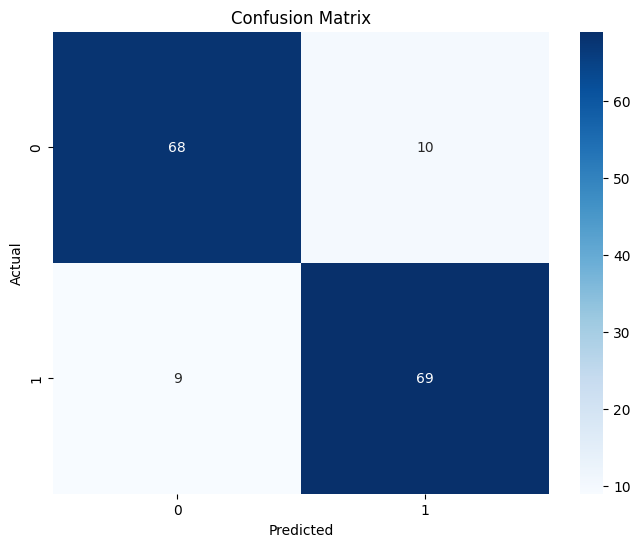

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_train_balanced, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

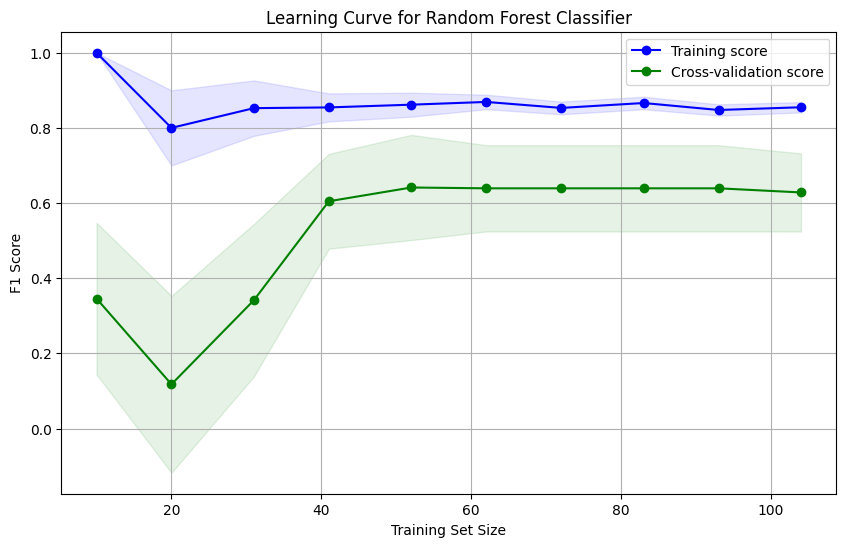

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.model_selection import learning_curve

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Use the best parameters you have found so far
    max_depth=20,
    class_weight='balanced',
    random_state=42
)

# Set up the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model,
    X, y,
    cv=5,                    # 5-fold cross-validation
    scoring='f1',            # Adjust to your preferred metric (f1, accuracy, etc.)
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)  # 10 evenly spaced train sizes from 10% to 100%
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation score")

# Plot the shaded region for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

# Add labels and title
plt.title("Learning Curve for Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()

plt.show()


In [ ]:
import joblib
# Save your trained model
joblib.dump(rf_model, 'best_seller_model.pkl')

['best_seller_model.pkl']

In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.8.0
Seaborn version: 0.13.2


In [ ]:
print("joblib version:", joblib.__version__)
print("sklearn:", sklearn.__version__)
print("imblearn:",imblearn.__version__)

joblib version: 1.4.2
sklearn: 1.5.2
imblearn: 0.12.4
